### Понижение размерности

Автор - Т. Вильданов

#### Цель работы

Применить методы понижения размерности для решения задач машинного обучения.

#### Задания для выполнения

1. Загрузите прилагающийся датасет credit_data.
2. Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.
3. Выведите информацию о количественных параметрах датасета;
4. Разделите эти данные на тестовую и обучающую выборки;
5. Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.
6. Оцените полученную модель с помощью метрик.
7. Понизьте размерность данных с помощью метода главных компонент.
8. Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.
9. Постройте график зависимости точности модели от размерности данных.
10. Сделайте вывод о применимости модели.

#### Методические указания

Для начала работы нам потребуется импортировать необходимые библиотеки:

```py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
```

В первую очередь загрузим датасет, выведем количество пустых значений в каждом столбце:

```py
data = pd.read_csv(r'.../credit_data.csv',delimiter=',')
print(data.isna().sum())
```

Удалим столбцы не несущие какой-либо полезной информации, а также вынесем метки строк в отдельный массив target:

```py
target = data['Risk']
data = data.drop(['Risk','Unnamed: 0', 'Purpose'], axis=1)
```

Заменим текстовые категориальные признаки на числовые с помощью функции map. Пустые значения в столбцах заменим на 0.

```py
data['Saving accounts'] = data['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
data['Checking account'] = data['Checking account'].map({"little":1,"moderate":2,"rich":3 });
target = target.map({"good":1,"bad":0});
data['Saving accounts'] = data['Saving accounts'].fillna(0)
data['Checking account'] = data['Checking account'].fillna(0)
```

Заменим полученные категориальные признаки на индикаторы с помощью метода get_dummies. Это необходимо поскольку модель случайных лесов плохо работает с категориальными признаками, но неплохо обучается с индикаторами.

```py
new_data = pd.get_dummies(data)
new_data.head()
```

Нормализуем данные и понизим размерность данных до 2-х атрибутов.

```py
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA;
from sklearn.preprocessing import normalize;
y = KMeans().fit_predict(new_data)
X = normalize(new_data);
x_PCA = PCA(n_components=2).fit_transform(X,2);
print(x_PCA.shape)
```

Построим график на основе полученных атрибутов:

```py
plt.scatter(x_PCA[:,0], x_PCA[:,1], c=target, cmap='Spectral')
plt.figure()
```


#### Задания для выполнения



In [73]:
# https://habr.com/ru/company/ruvds/blog/488342/

In [74]:
import pandas as pd
import numpy as np

1. Загрузите прилагающийся датасет credit_data.


In [75]:
data = pd.read_csv('credit_data.csv')
data.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True )
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [112]:
new_data = pd.get_dummies(data)
new_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,1.0,1.0,1169,6,1
1,22,2,2,1,1.0,2.0,5951,48,1
2,49,1,1,1,1.0,1.0,2096,12,2
3,45,1,2,2,1.0,1.0,7882,42,3
4,53,1,2,2,1.0,1.0,4870,24,4


2. Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.


In [77]:
data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [78]:
data['Risk'].unique()

array(['good', 'bad'], dtype=object)

In [79]:
# заменяем текстовые значения на присвоенные числа для дальнейшего обучения
data = data.replace({'Sex':{'male':1, 'female':2}})
data = data.replace({'Housing':{'own':1, 'free':2, 'rent':3}})
data = data.replace({'Saving accounts':{'little':1, 'quite rich':2, 'rich':3, 'moderate':4}})
data = data.replace({'Checking account':{'little':1, 'moderate':2, 'rich':3}})
data = data.replace({'Purpose':{'radio/TV':1, 'education':2, 'furniture/equipment':3, 'car':4, 'business':5, 'domestic appliances':6, 'repairs':7, 'vacation/others':8}})
data = data.replace({'Risk':{'good':0, 'bad':1}})


Заполнение отсутсвующих значений

In [80]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [81]:
data['Saving accounts'].fillna(data['Saving accounts'].mode()[0], inplace=True)
data['Checking account'].fillna(data['Checking account'].mode()[0], inplace=True)

In [82]:
data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

3. Выведите информацию о количественных параметрах датасета;


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Sex               1000 non-null   int64  
 2   Job               1000 non-null   int64  
 3   Housing           1000 non-null   int64  
 4   Saving accounts   1000 non-null   float64
 5   Checking account  1000 non-null   float64
 6   Credit amount     1000 non-null   int64  
 7   Duration          1000 non-null   int64  
 8   Purpose           1000 non-null   int64  
 9   Risk              1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.2 KB


In [84]:
data.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.310000,1.904000,1.466000,1.468000,1.395000,3271.258000,20.903000,3.096000,0.300000
std,11.375469,0.462725,0.653614,0.779392,0.981804,0.604434,2822.736876,12.058814,1.630166,0.458487
min,19.000000,1.000000,0.000000,1.000000,1.000000,1.000000,250.000000,4.000000,1.000000,0.000000
25%,27.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1365.500000,12.000000,1.000000,0.000000
50%,33.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2319.500000,18.000000,3.000000,0.000000
75%,42.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3972.250000,24.000000,4.000000,1.000000
max,75.000000,2.000000,3.000000,3.000000,4.000000,3.000000,18424.000000,72.000000,8.000000,1.000000


4. Разделите эти данные на тестовую и обучающую выборки;


In [85]:
# выделяем целевую переменную
target = data['Risk']
data.drop(columns = ['Risk'], axis = 1, inplace=True )

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42) # test new_data

In [118]:
from sklearn.preprocessing import StandardScaler

# масштабирование признаков
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
y_train = np.array(y_train)

5. Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.


In [88]:
# Random Forest случайный лес
# Principal Component Analysis Метод главных компонент
# Hyperparameter Tuning оптимизация гиперпараметров

scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'time'],
    index=[
        'RF',
        'RF + PCA',
        'RF + PCA + HT'
    ]
)

In [89]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    return pd.Series(
        (accuracy, precision, recall, f1_score),
        index=['accuracy', 'precision', 'recall', 'f1_score']
    )

In [90]:
import time

def model_and_metrics(model, x_train, y_train, x_test, y_test):
    start = time.time() # точка отсчета времени
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  
    end = time.time() - start # время работы программы
    returned = get_metrics(y_test, y_pred).append(pd.Series((end), index = ['time']))
    return returned

In [91]:
from sklearn.ensemble import RandomForestClassifier

scores.iloc[0] = model_and_metrics(RandomForestClassifier(), x_train_scaled, y_train, x_test_scaled, y_test)

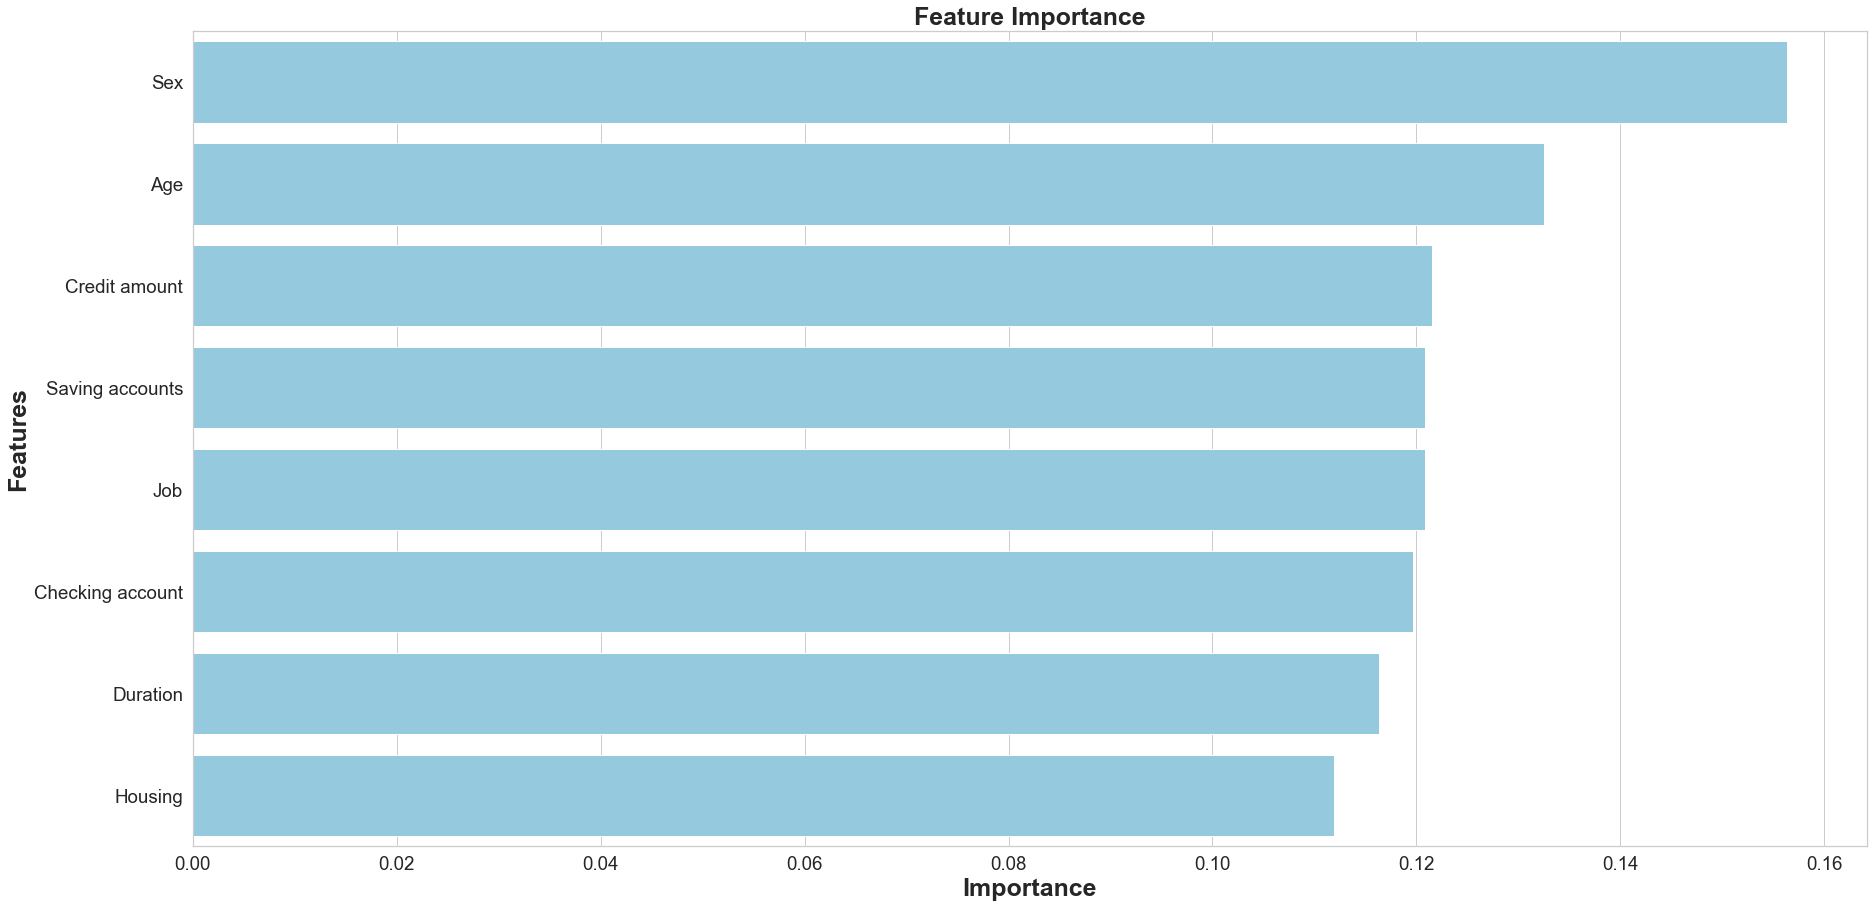

None

,Features,Gini-Importance
0,Sex,0.156339
1,Age,0.132537
2,Credit amount,0.121539
3,Saving accounts,0.120859
4,Job,0.120847
5,Checking account,0.119630
6,Duration,0.116317
7,Housing,0.111932


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# какие признаки являются самыми важными для RF-модели

feats = {}
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

6. Оцените полученную модель с помощью метрик.


In [93]:
scores

,accuracy,precision,recall,f1_score,time
RF,0.7,0.478261,0.186441,0.268293,0.513842
RF + PCA,NaN,NaN,NaN,NaN,NaN
RF + PCA + HT,NaN,NaN,NaN,NaN,NaN


7. Понизьте размерность данных с помощью метода главных компонент.


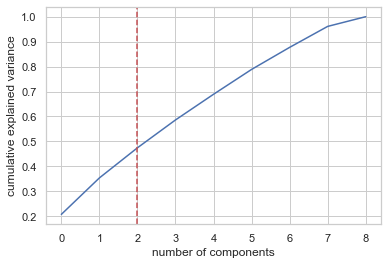

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.207612,0.207612
1,0.353709,0.146097
2,0.474429,0.120720
3,0.586076,0.111648
4,0.688995,0.102919
5,0.788625,0.099630
6,0.877020,0.088395
7,0.961094,0.084074
8,1.000000,0.038906


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components=9)
pca_test.fit(x_train_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(2, color='r', linestyle = '--')
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

воспользуемся PCA для уменьшения числа компонент с 9 до 7

In [121]:
pca = PCA(n_components=2)
pca.fit(x_train_scaled)
x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

8. Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.


In [122]:
scores.iloc[1] = model_and_metrics(RandomForestClassifier(), x_train_scaled_pca, y_train, x_test_scaled_pca, y_test)

9. Постройте график зависимости точности модели от размерности данных.


In [111]:
results = pd.DataFrame(columns=["N_attributes", "accuracy", "precision","recall"])

In [114]:
from sklearn.preprocessing import normalize

for N in range(2, new_data.shape[1]):
    X = normalize(new_data);
    x_PCA = PCA(n_components=2).fit_transform(X,N);
    X_train, X_test, y_train, y_test = train_test_split(x_PCA, target, test_size=0.2)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res = pd.DataFrame(
        [[
            
            N,
            metrics.accuracy_score(y_test, y_pred),
            metrics.precision_score(y_test, y_pred),
            metrics.recall_score(y_test, y_pred)
        ]],
        columns=results.columns
    )
    results = pd.concat([results, res], ignore_index=True)

In [115]:
results

,N_attributes,accuracy,precision,recall
0,2,0.690,0.428571,0.263158
1,3,0.685,0.352941,0.226415
2,4,0.640,0.428571,0.272727
3,5,0.685,0.333333,0.340426
4,6,0.680,0.392857,0.189655
5,7,0.655,0.275000,0.215686
6,8,0.705,0.444444,0.370370


Text(0, 0.5, 'Значение метрики')

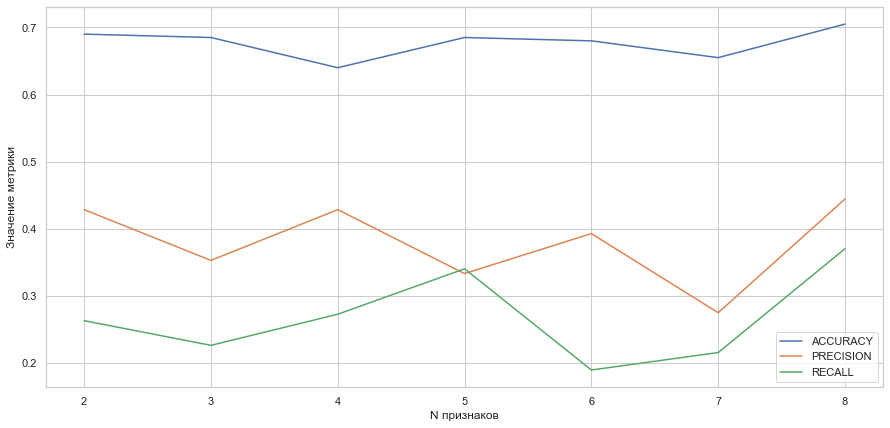

In [124]:
plt.figure(figsize=(15,7))
plt.plot(results.N_attributes, results.accuracy, label="ACCURACY")
plt.plot(results.N_attributes, results.precision, label="PRECISION")
plt.plot(results.N_attributes, results.recall, label="RECALL")
plt.legend();
plt.xlabel('N признаков')
plt.ylabel('Значение метрики')

10.(*) Оптимизируйте гиперпараметры модели

Подбор гиперпараметров: 
- n_estimators — число «деревьев» в «случайном лесу».
- max_features — число признаков для выбора расщепления.
- max_depth — максимальная глубина деревьев.
- min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
- min_samples_leaf — минимальное число объектов в листьях.
- bootstrap — использование для построения деревьев подвыборки с возвращением.

In [95]:
from sklearn.model_selection import RandomizedSearchCV

# генерируем все возможные виды гиперпараметров
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

# создаем словарь параметров
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()

# инициализируем функцию подбора параметров
rs = RandomizedSearchCV(model, 
                        param_dist, 
                        n_iter = 100,  
                        verbose = 1, # уровень детализации
                        n_jobs=-1, # использование всех процессов для параллельного выполнения
                        random_state=0)

rs.fit(x_train_scaled_pca, y_train)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 34,
 'max_features': 'log2',
 'max_depth': 12,
 'bootstrap': False}

результаты работы RandomizedSearchCV

In [96]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,100,12,34,log2,12,False,0.70625,0.72500,0.71000,1
1,400,2,7,log2,2,False,0.72500,0.70000,0.71000,2
2,300,39,18,log2,7,True,0.70000,0.71250,0.70625,3
3,1000,44,2,sqrt,9,True,0.69375,0.70625,0.70500,4
4,400,34,7,log2,2,True,0.71875,0.70625,0.70500,4
5,200,12,18,log2,9,True,0.69375,0.71250,0.70500,6
6,400,7,34,log2,7,False,0.70000,0.71250,0.70375,7
7,100,18,23,log2,10,True,0.71875,0.69375,0.70375,7
8,300,39,2,sqrt,3,True,0.72500,0.70625,0.70375,9
9,100,18,12,log2,2,False,0.71875,0.70625,0.70375,9


Теперь создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают.

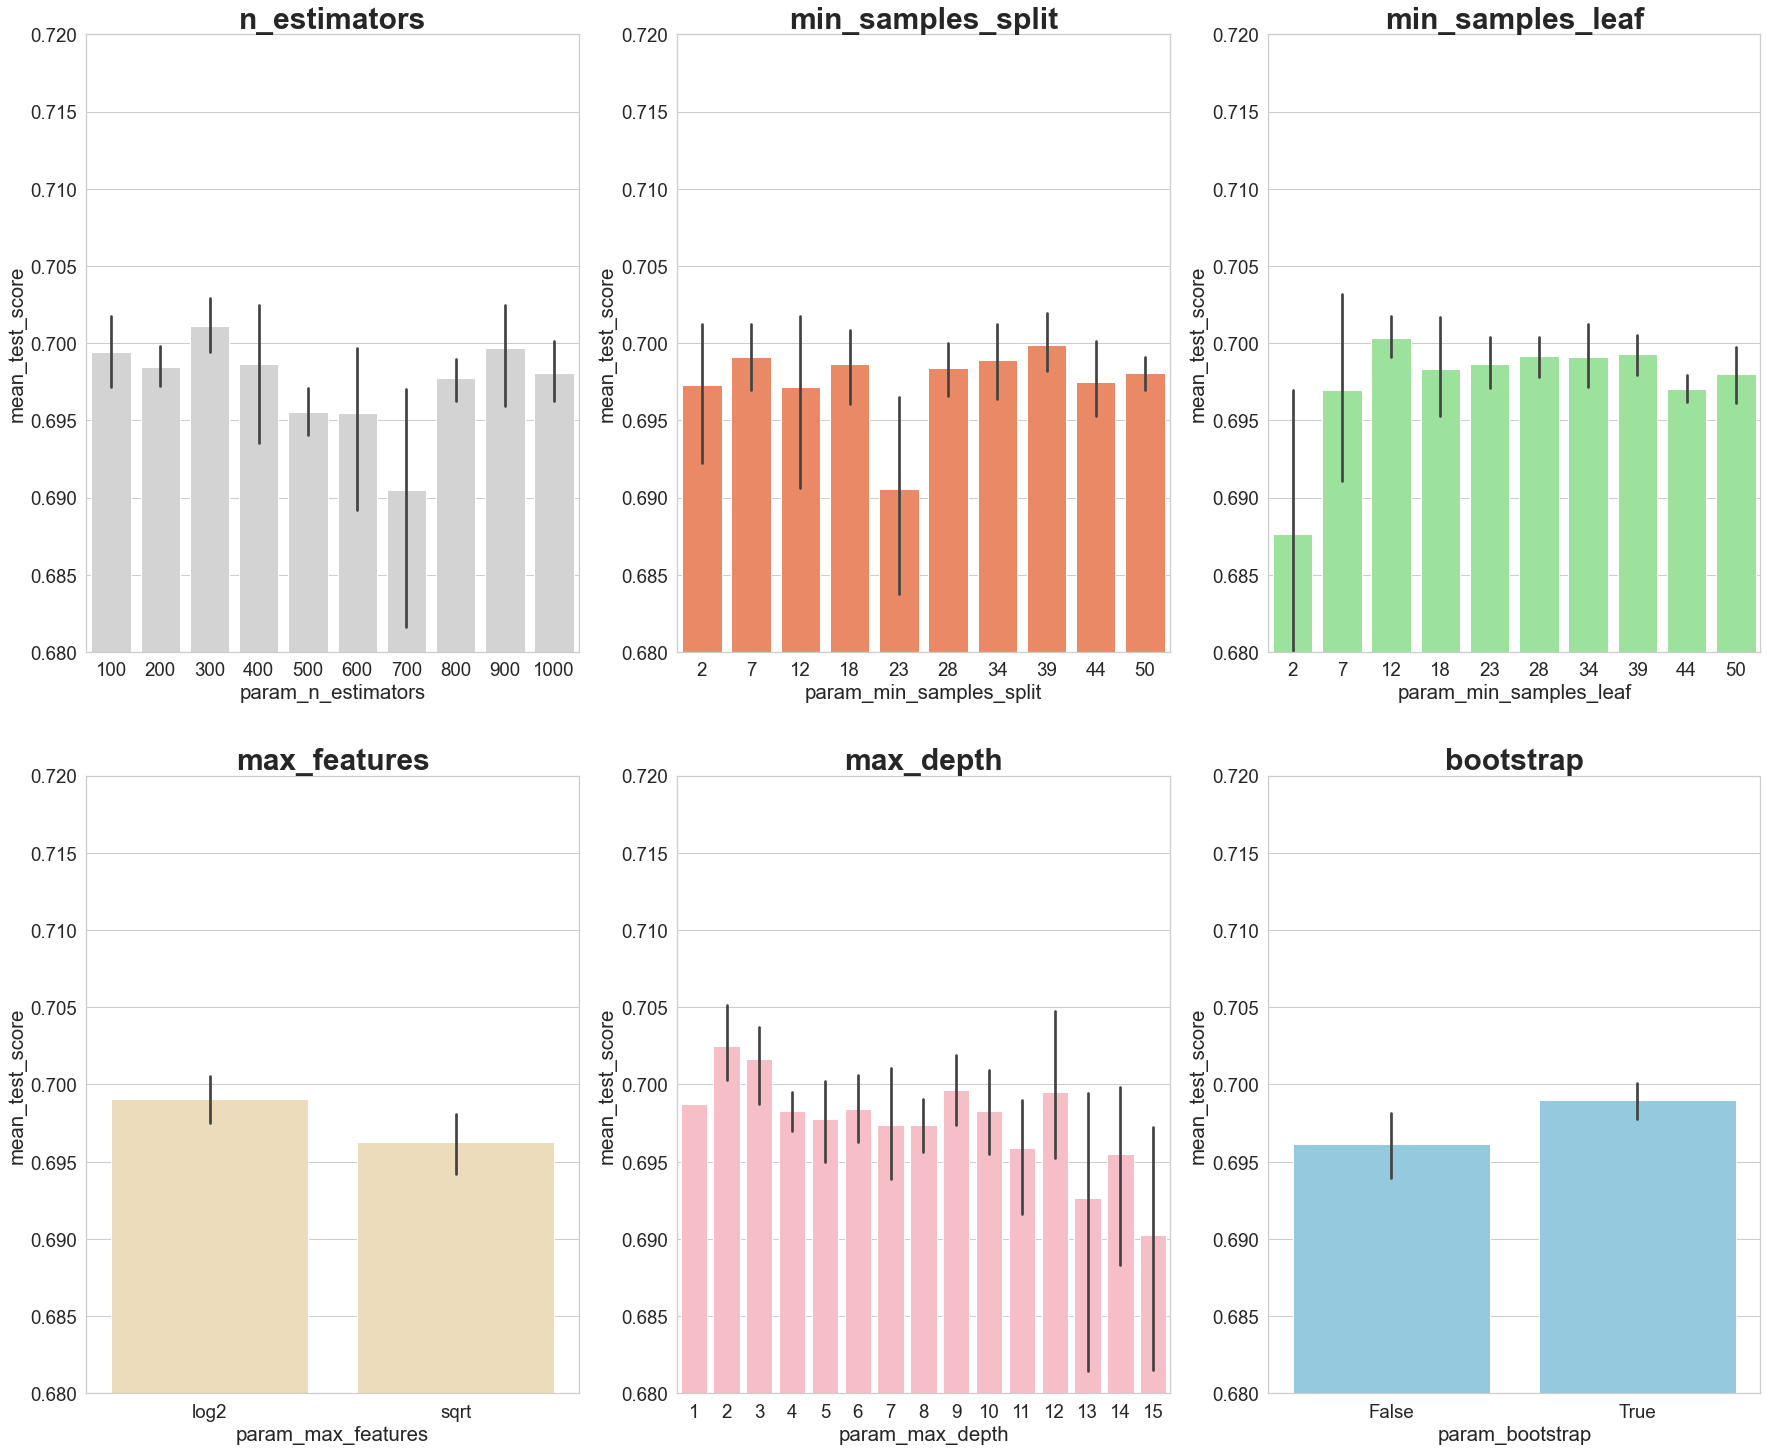

In [97]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.68,.72])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.68,.72])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.68,.72])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.68,.72])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.68,.72])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.68,.72])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

Для более точного подбора гиперпараметров воспользуемся GridSearchCV. В нем прогоняются все возможные коминации гиперпараметров, в отличии от RandomizedSearchCV, где мы самостоятельно задаем количесвто итераций поиска.

In [98]:
from sklearn.model_selection import GridSearchCV

# записываем лучшие подобранные параметры
n_estimators = [100,200,300]
min_samples_split = [18,28,39,2]
min_samples_leaf = [12,23,28,34]
max_features = ['log2']
max_depth = [2,3,9]
bootstrap = [True]

# создаем словарь параметров
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()

# инициализируем функцию подбора параметров
gs = GridSearchCV(model, 
                  param_grid, 
                  verbose = 1, # уровень детализации
                  n_jobs=-1) # использование всех процессов для параллельного выполнения

gs.fit(x_train_scaled_pca, y_train)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=23,
                       min_samples_split=39, n_estimators=200)
{'bootstrap': True, 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 23, 'min_samples_split': 39, 'n_estimators': 200}


Обучаем модель и смотрим на результаты

In [99]:
model = RandomForestClassifier()

start = time.time() # точка отсчета времени
model.fit(x_train_scaled_pca, y_train)
y_pred_gs = gs.best_estimator_.predict(x_test_scaled_pca)
end = time.time() - start # время работы программы
returned = get_metrics(y_test, y_pred_gs).append(pd.Series((end), index = ['time']))

In [100]:
scores.iloc[2] = returned

11. Сделайте вывод о применимости модели.

In [123]:
scores

,accuracy,precision,recall,f1_score,time
RF,0.7,0.478261,0.186441,0.268293,0.513842
RF + PCA,0.68,0.419355,0.220339,0.288889,0.170626
RF + PCA + HT,0.72,0.636364,0.118644,0.2,0.829654
